# 深度學習初探

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.3.0


## MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_test)

10000

In [ ]:
len(x_train)

60000

In [ ]:
n = 80
X = x_train[n]
Y = y_train[n]

In [ ]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 138,
        201, 253, 255, 232, 107,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 219, 252,
        252, 210, 207, 214, 252, 119,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

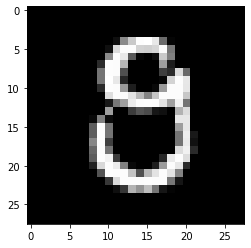

In [ ]:
plt.imshow(X,cmap='gray')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train[n]

9

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Step1

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(200, input_dim=784, activation='relu'))

In [ ]:
model.add(Dense(400, activation='relu'))

In [ ]:
model.add(Dense(400, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='mse', 
              optimizer=SGD(lr=0.087), 
              metrics=['accuracy']) #過程想看到正確率

In [ ]:
# 看目前的 model長什麼樣子
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 401,810
Trainable params: 401,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, 
          batch_size=100, #要多少筆才要調參數 --> 就像做習題時，我們想做幾題，就看答案檢討
          epochs=10) 

Epoch 1/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0843 - accuracy: 0.3558
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0528 - accuracy: 0.7307
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0259 - accuracy: 0.8576
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0191 - accuracy: 0.8850
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0165 - accuracy: 0.8982
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0150 - accuracy: 0.9055
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0140 - accuracy: 0.9104
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0132 - accuracy: 0.9158
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0126 - accuracy: 0.9202
Epoch 10/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0121 - accuracy: 0.9226

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9266


[0.01148033794015646, 0.9265999794006348]

In [ ]:
model.save('my_nn.h5')

### 如果想要存到自己的雲端硬碟

In [1]:
from google.colab import drive

In [3]:
# 先看一下我們目前的目錄
!ls
!pwd

sample_data
/content


In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!ls

drive  sample_data


In [8]:
!ls drive/

'My Drive'


In [ ]:
# 使用linux指令cp，把存起來的資料放到雲端硬碟
# drive/'My Drive' 就是我們的硬碟
!cp my_nn.h5 drive/'My Drive'

In [ ]:
# 如果你的檔案太多，不好找，可以建一個叫 'py_day6'的資料夾
!mkdir /drive/'My Drive'/py_day6
!cp my_nn.h5 /drive/'My Drive'/py_day6/